In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

In [2]:
root_dir = "drive/MyDrive/ITA/Seocho_23/Code/"
# root_dir는 각자 다 다름
# 예) root_dir = "/content/drive/MyDrive/어쩌고저쩌고_위치/"
# 드라이브 상에서 작업공간을 어디에 만들었느냐에 따라
df = pd.read_csv(root_dir + "data_admission.csv")
# error: No such file or directory
# -> root_dir 확인해주세요 마지막에 슬래시 / 포함되어있는지
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
np.random.seed(42)
# make_blobs: blob (덩어리)
# 인공/인위적인 데이터 만들기
# 데이터셋의 성질 얼마나 자연/야생
# synthetic dataset -- real-world dataset -- in-the-wild (raw) dataset
# in-the-wild 왜 쓰지?
# 쓸 수 밖에 없는 상황 -> 전처리할 시간이 없어서 -> time-critical 응용/서비스
# 우리 모델이 이렇게나 강인(robust)함을 보여주기 위해

In [4]:
X, _ = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]])
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
# 기본값으로 표준편차 1.0만큼 퍼지게 만듦
X.shape

(5000, 2)

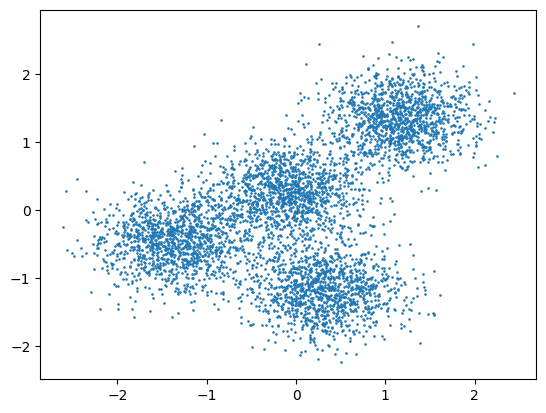

In [5]:
_, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], marker='.', s=3)
plt.show()

In [6]:
km = KMeans(n_clusters=5, init="random", random_state=42) # 가독성을 위해 인자 이름까지 굳이 적음
# 랜덤으로 했을 때 많이 다른 두 그림 포함시켜놓기
# libgen.is
km.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=5)

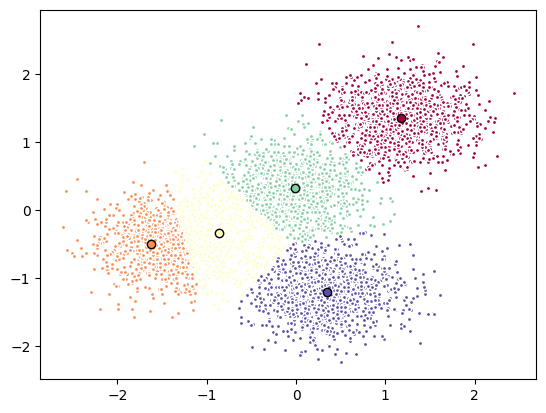

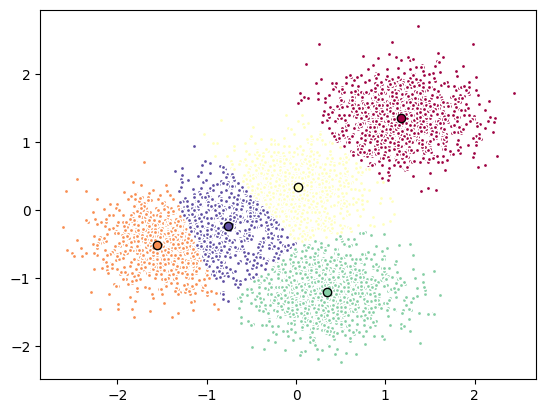

In [7]:
km.labels_

array([4, 0, 1, ..., 1, 1, 4], dtype=int32)

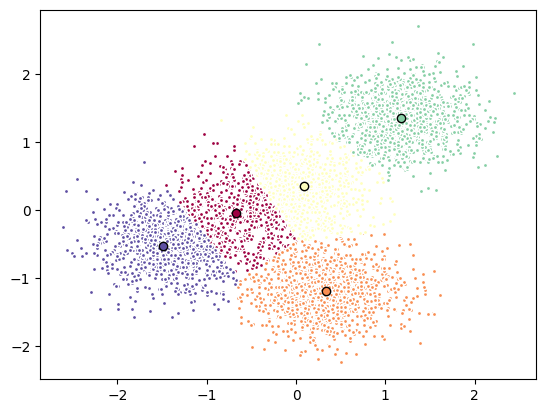

In [8]:
# 피팅된 군집 그려보기
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(km.labels_))))
# pyplot cm -> colormap
# pyplot 내 구현되어있는 여러 colormap (값과 색 맵핑) 중 Spectral이라 불리는 colormap 클래스 가져오기
# linspace 인자 세개 -> 0에서 1범위를 라벨 갯수만큼 나눠달라
# colors # (r, g, b, a) 4-리스들의 배열
# red, green, blue, alpha(불투명도(즉 opacity))(0이면 완전 투명)
_, ax = plt.subplots()

# zip -> 지퍼 양쪽에서 하나씩이 맞물림
# zip이 시퀀스 자료형 두개를 받아서 i번째 데이터끼리 쌍을 만들어줌
# 이때 두 시퀀스 자료형의 길이는 같아야 함
# 아래 루프는 군집마다 돈다는 뜻
for k, col in zip(range(len(km.cluster_centers_)), colors):
  membership = (km.labels_ == k) # boolean array 생성 (masking하는 데 쓸 거임)
  cluster_center = km.cluster_centers_[k] # 군집 중심점

  # 군집 소속점 (중심점 외 모두)
  ax.plot(X[membership, 0], X[membership, 1], "w", markerfacecolor=col, marker=".")
  # 군집 중심점
  ax.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col, markeredgecolor="k", markersize=6)
plt.show()

In [9]:
# DBSCAN으로 X 군집화 해보기
# dbscan = DBSCAN(eps= , min_samples=)
# dbscan = DBSCAN(eps=0.5, min_samples=20)
dbscan = DBSCAN(eps=0.4, min_samples=455) # core sample 갯수 851
dbscan = DBSCAN(eps=0.45, min_samples=500) # core sample 갯수 1322
dbscan = DBSCAN(eps=0.5, min_samples=545) # core sample 갯수 1812
dbscan.fit(X)


DBSCAN(min_samples=545)

In [10]:
print(set(dbscan.labels_))

{0, 1, 2, 3, -1}


In [11]:
dbscan.core_sample_indices_
num_core_points = len(dbscan.core_sample_indices_)
print(num_core_points)
if num_core_points < 20:
  for kth_core in dbscan.core_sample_indices_:
    print(X[kth_core, 0], X[kth_core, 1])

1812


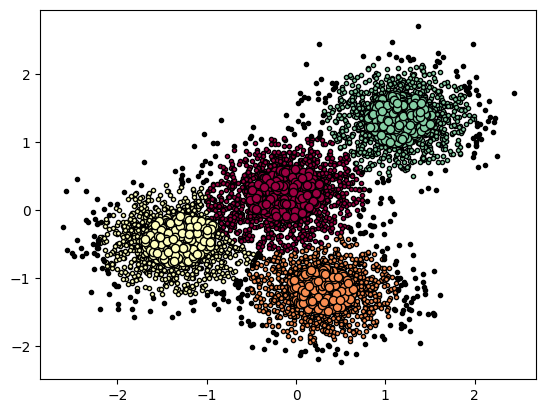

In [12]:
# 피팅된 군집 그려보기

# noise는 label이 -1
labels = dbscan.labels_
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))
core_samples_mask = np.zeros_like(labels, dtype=bool)
# zeros_like(인자_배열) -> 인자_배열과 같은 shape의 0으로 채워진 배열을 만듦
# 근데 dtype=bool로 해서 다 False로 만들어짐 (0)
core_samples_mask[dbscan.core_sample_indices_] = True

# pyplot cm -> colormap
# pyplot 내 구현되어있는 여러 colormap (값과 색 맵핑) 중 Spectral이라 불리는 colormap 클래스 가져오기
# linspace 인자 세개 -> 0에서 1범위를 라벨 갯수만큼 나눠달라
# colors # (r, g, b, a) 4-리스들의 배열
# red, green, blue, alpha(불투명도(즉 opacity))(0이면 완전 투명)
_, ax = plt.subplots()

# zip -> 지퍼 양쪽에서 하나씩이 맞물림
# zip이 시퀀스 자료형 두개를 받아서 i번째 데이터끼리 쌍을 만들어줌
# 이때 두 시퀀스 자료형의 길이는 같아야 함
# 아래 루프는 군집마다 돈다는 뜻

for k, col in zip(set(dbscan.labels_), colors):
    class_member_mask = labels == k # 멤버들 마스크
    # 멤버는 소속이 바뀔 때마다 마스크가 달라져야 하니까 (색을 다르게 입힐 거니까)
    # 소속마다 (즉 for루프마다 마스크 새로 만듦)

    if k == -1: # noise로 판명된 경우
        # Black used for noise.
        col = [0, 0, 0, 1] # rgba

    # 군집 멤버(non-core)들 border point 색칠하기
    #
    xy = X[class_member_mask & ~core_samples_mask]
    # & 하면 element-wise 논리 연산자 AND
    # 즉, 조건문 의미는: 지금 보고 있는 군집 소속이면서, 코어 샘플이 아닌
    ax.plot(xy[:, 0], xy[:, 1], ".", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6)

    # core point 색칠하기
    xy = X[class_member_mask & core_samples_mask]
    # 조건문 의미: 지금 보고 있는 군집 소속이면서, 코어 샘플인
    ax.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6)
plt.show()

In [13]:
# CIA Country Facts
df_cia = pd.read_csv(root_dir + "CIA_Country_Facts.csv")
df_cia

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [14]:
df_cia.columns
# Country: 국가명
# Region
# Population
# Area
# Pop Density
# Coastline 해안지역 비율
# Net migration 입국자 수
# Infant mortality
# Arable: 단기 농지
# Crops: 장기 농업용 토지
# Agriculture/Industry/Service: 1, 2, 3차 산업 (0~1 비)

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [15]:
# 특성 2개 골라서 KMeans나 DBSCAN으로 군집화 후
# 그림 그려서 공유

In [16]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score

In [17]:
i = df_cia.columns.get_loc("Agriculture")
j = df_cia.columns.get_loc("Industry")
k = df_cia.columns.get_loc("Service")

X_df = df_cia[[df_cia.columns[i], df_cia.columns[j], df_cia.columns[k]]]
X = X_df.dropna().values
X = StandardScaler().fit_transform(X.astype(float))
# 일단 칼럼들부터 뽑고 나서 dropna를 함;
# 안 그러면 drop되는 데이터가 너무 많을 수 있으니
X_df = pd.DataFrame({X_df.columns[0]: X[:, 0], X_df.columns[1]: X[:, 1], X_df.columns[2]: X[:, 2]})


In [18]:
fig = px.scatter_3d(X_df, x=X_df.columns[0], y=X_df.columns[1], z=X_df.columns[2])
fig.update_traces(marker_size=2)
fig.show()

In [19]:
dbscan = DBSCAN(eps=0.6, min_samples=2) # 기본값 eps=0.5, min_samples=5
# 0.4, 2 -> 9
# 0.5, 2 -> 9
# 0.6, 2 -> 5

dbscan.fit(X)
print(len(set(dbscan.labels_)))

5


In [20]:
labels = dbscan.labels_


### 3차원 플롯
X_df["clusters"] = labels
fig = px.scatter_3d(X_df, x=X_df.columns[0], y=X_df.columns[1], z=X_df.columns[2], color=X_df["clusters"])
fig.update_traces(marker_size=2)

fig.show()


In [21]:
# data_health.csv 읽어와서
# age, avg_glucose_level, bmi
df_health = pd.read_csv(root_dir + "data_health.csv")
df_health
X_df = df_health[["age", "avg_glucose_level", "bmi"]] # pandas 데이터프레임
X_df = X_df.dropna()
X = X_df.values # numpy 배열
X = StandardScaler().fit_transform(X.astype(float))
fig = px.scatter_3d(X_df, x=X_df.columns[0], y=X_df.columns[1], z=X_df.columns[2]) # unscaled 그림 그리기
fig = px.scatter_3d(pd.DataFrame({"age": X[:,0],
                                  "avg_glucose_level": X[:, 1],
                                  "bmi": X[:, 2]}), x=X_df.columns[0], y=X_df.columns[1], z=X_df.columns[2]) # scaled 그림 그리기
fig.update_traces(marker_size=0.5)
fig.show()

In [22]:
dbscan = DBSCAN(eps=0.4, min_samples=17)
dbscan.fit(X)
labels = dbscan.labels_
print(set(labels))

{0, 1, -1}


In [23]:
X_df["clusters"] = labels
fig = px.scatter_3d(X_df, x=X_df.columns[0], y=X_df.columns[1], z=X_df.columns[2], color=X_df["clusters"])
fig.update_traces(marker_size=0.5)
fig.show()

In [24]:
# 차원 축소
# dimension(ality) reduction
# PCA, FastICA, NMF
# Principal Component Analysis,
# Independent Component Analysis,
# Non-negative Matrix Factorization (MF 기반 추천시스템에서 다시 보기)

In [25]:
from sklearn.decomposition import PCA, FastICA, NMF
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", as_frame=False) # 28화소 * 28화소; as_frame은 사진으로 가져올지 여부

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning:

The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.



In [26]:
X, y = mnist.data, mnist.target
pca = PCA() # n_components를 비워두면 None이 됨
# 차원 수를 줄이지 않음! 원래 차원을 비틀기만 함 좌표 변환 등
pca.fit(X)
pca.explained_variance_ratio_.sum() # 원래 데이터의 정보량(PCA 관점에서는 분산) 중 얼마나 설명(보존)됐느냐
# 각 principal axis에 대해서
# 즉 각 주성분이 원래 데이터의 얼만큼을 설명(capture)했는지
cumsum = np.cumsum(pca.explained_variance_ratio_) # 누적 합
threshold = 0.90
d = np.argmax(cumsum >= threshold)
print(d)

86


In [27]:
X.shape

(70000, 784)

In [28]:
# 시각화
# 3차원
pca_3d = PCA(3)
X_reduced = pca_3d.fit_transform(X)
X_df = pd.DataFrame({"PC_0": X_reduced[:, 0],
                     "PC_1": X_reduced[:, 1],
                     "PC_2": X_reduced[:, 2]})

In [29]:
fig = px.scatter_3d(X_df, x=X_df.columns[0], y=X_df.columns[1], z=X_df.columns[2], color=y)
fig.update_traces(marker_size=1)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [30]:
ica = FastICA(n_components=3)
X_reduced = ica.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning:

Starting in v1.3, whiten='unit-variance' will be used by default.



In [31]:
X_df = pd.DataFrame({"PC_0": X_reduced[:, 0],
                     "PC_1": X_reduced[:, 1],
                     "PC_2": X_reduced[:, 2]})
fig = px.scatter_3d(X_df, x=X_df.columns[0], y=X_df.columns[1], z=X_df.columns[2], color=y)
fig.update_traces(marker_size=1)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [32]:
nmf = NMF(n_components=3)
X_reduced = nmf.fit_transform(X)


In [33]:
X_df = pd.DataFrame({"PC_0": X_reduced[:, 0],
                     "PC_1": X_reduced[:, 1],
                     "PC_2": X_reduced[:, 2]})
fig = px.scatter_3d(X_df, x=X_df.columns[0], y=X_df.columns[1], z=X_df.columns[2], color=y)
fig.update_traces(marker_size=1)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [34]:
# semi-supervised learning (준지도학습)
# self-training (1997)
# label spreading (2004)

In [35]:
# 인공지능 (artificial intelligence)
# 1956년에 McCarthy가 용어를 만듦
# 1974년 논문 Marvin Minsky 저 Steps towards artifical intelligence
# sci-fi 아이작 아시모프 소설가 세계관에서 로봇이 지켜야 할 세가지 규칙 (아이로봇 영화에서도 나옴)
# 1. 인간을 해치면 안 된다; 2. 인간의 명령에 복종해야 한다; 3. 스스로를 보호해야 한다
# 지능을 갖춘 발명품으로부터 바라는 점
# 윌스미스: 너는 교향곡을 쓰고 명작(masterpiece)을 그리고, ???
# 로봇: (그럼) 당신은 할 수 있습니까?
# 2012년: AlexNet이 ImageNet 챌린지를 큰 폭으로 경쟁자들을 누르고 우승함
# 2013년: DeepMind가 Demis Hassabis; Atari 게임 플레이하는 AI 공개 -> 벽돌깨기
# 알파고, 스타크래프트, 장기, 체스 -> 한 모델이 이거 다 하는 AI
# 2017년: Attention is all you need (Vaswani 저) -> 트랜스포머
# ...


In [36]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.datasets import load_iris

In [37]:
ssl = LabelSpreading(alpha=0.2) # alpha인자 기본값 0.2
# 비슷한 X한테는 같은 Label을 전파시키자
# 그럼 얼마나 비슷해야 Label을 베낄까? --> alpha (0, 1)
iris = load_iris()
# 일부 y만 삭제(drop)하자
rng = np.random.RandomState(42)
threshold = 0.2
to_drop = rng.rand(len(iris.target)) < threshold
labels = np.copy(iris.target)
labels[to_drop] = -1 # -1로 놓는다는 뜻은 라벨이 없다라고 LabelSpreading이 인식하도록 하기 위함

In [38]:
# 숙제:
# Part A:
# threshold를 가로 축으로 놓고
# f1-score를 세로 축으로 놔서
# X랑 y 각각 train test로 나누기
# X를 scaling하기
# (원하시면) K-fold 교차검증도 하기
# 대충 30개 정도 다른 threshold 값에 대해서 LabelSpreading 모델의 성능을 그래프로 그려보자

# Part B:
# threshold, alpha, f1-score를 3차원에서 플롯해보자

In [39]:
# coffee quality data cqi Kaggle에서 검색

In [40]:
ssl.fit(iris.data, labels)

LabelSpreading()